In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("D:/Gauri/SEM5/ML/week6/linear-regression-thatgauripai/advertising.csv")

print("\nFirst 5 rows:\n", df.head())


First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic statistics:\n", df.describe())


Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Basic statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


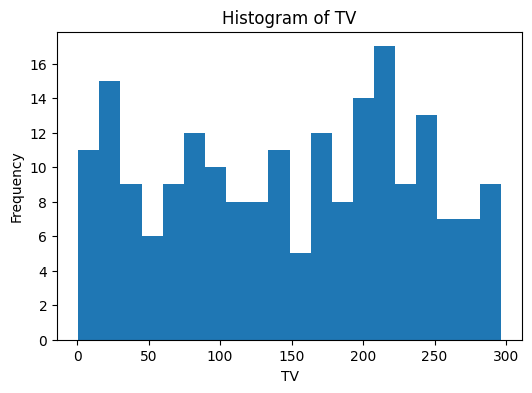

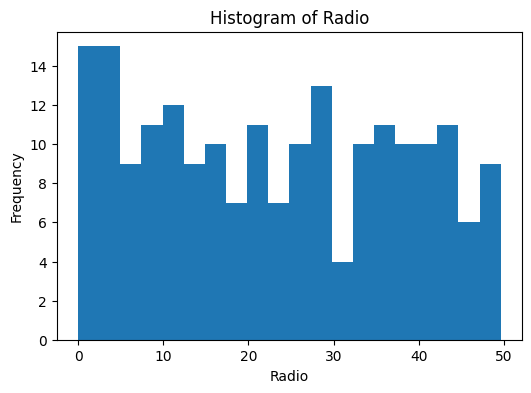

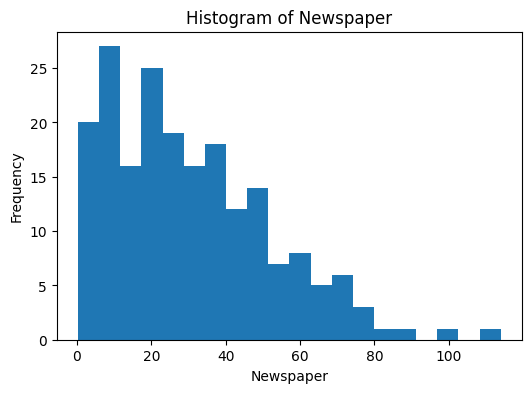

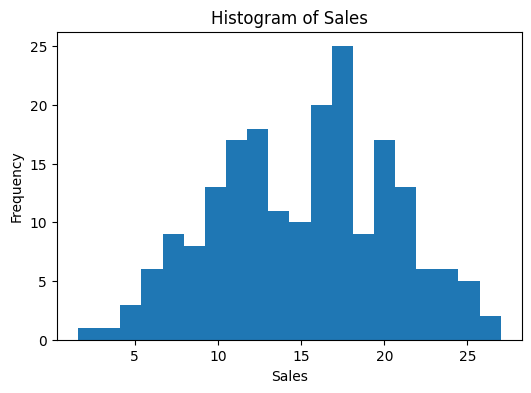

In [6]:
# Histograms
for col in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
split_settings = {'80:20': 0.2, '70:30': 0.3, '60:40': 0.4}
results = []

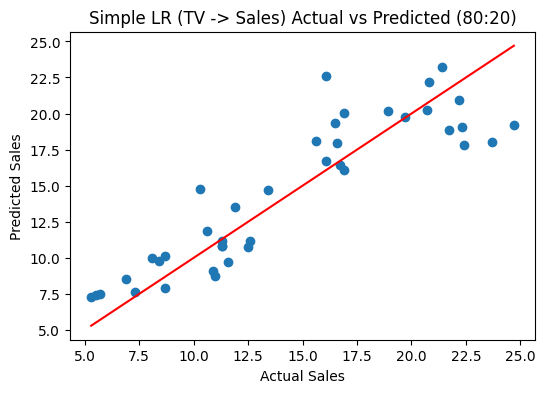

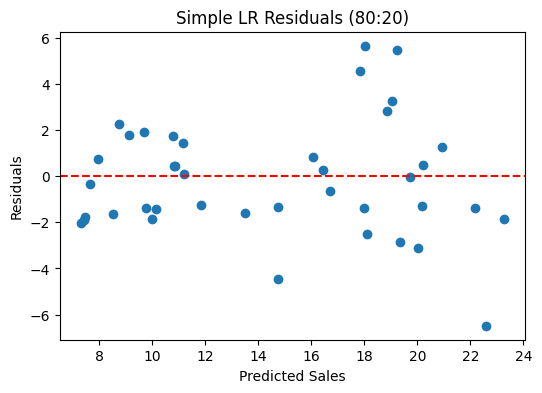

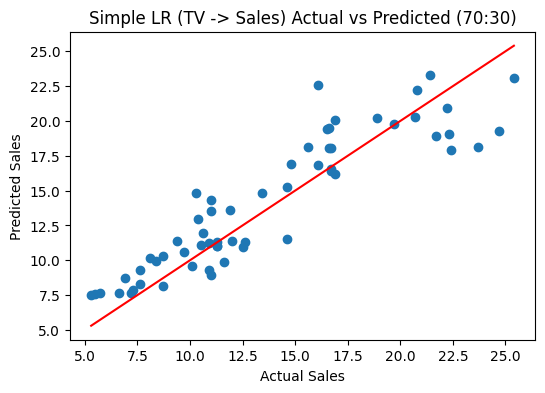

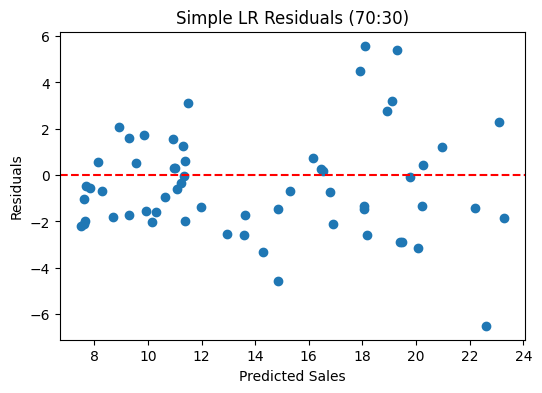

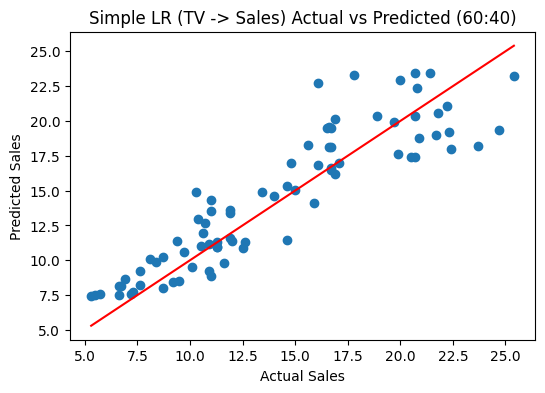

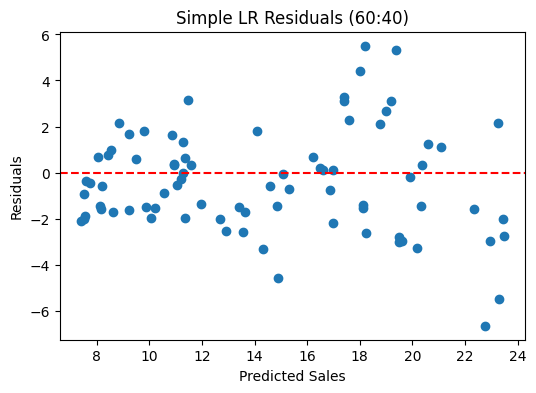

In [9]:
for label, test_size in split_settings.items():
    # Simple Linear Regression (TV only)
    X_s = df[['TV']]
    y = df['Sales']
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y, test_size=test_size, random_state=42)
    lr_s = LinearRegression()
    lr_s.fit(X_train_s, y_train_s)
    y_pred_s = lr_s.predict(X_test_s)

    # Multiple Linear Regression (TV, Radio, Newspaper)
    X_m = df[['TV', 'Radio', 'Newspaper']]
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y, test_size=test_size, random_state=42)
    lr_m = LinearRegression()
    lr_m.fit(X_train_m, y_train_m)
    y_pred_m = lr_m.predict(X_test_m)

    # Metrics
    results.append({
        'Split': label,
        'Train size': len(X_train_s),
        'Test size': len(X_test_s),
        'Simple R²': r2_score(y_test_s, y_pred_s),
        'Simple MSE': mean_squared_error(y_test_s, y_pred_s),
        'Simple MAE': mean_absolute_error(y_test_s, y_pred_s),
        'Multi R²': r2_score(y_test_m, y_pred_m),
        'Multi MSE': mean_squared_error(y_test_m, y_pred_m),
        'Multi MAE': mean_absolute_error(y_test_m, y_pred_m)
    })

    # ---- Plots for Simple Model ----
    plt.figure(figsize=(6,4))
    plt.scatter(y_test_s, y_pred_s)
    plt.plot([y_test_s.min(), y_test_s.max()],
             [y_test_s.min(), y_test_s.max()], color='red')
    plt.title(f'Simple LR (TV -> Sales) Actual vs Predicted ({label})')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.show()

    residuals_s = y_test_s - y_pred_s
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred_s, residuals_s)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Simple LR Residuals ({label})')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.show()

In [10]:
res_df = pd.DataFrame(results)
print("\nSummary of metrics for all splits:\n", res_df)


Summary of metrics for all splits:
    Split  Train size  Test size  Simple R²  Simple MSE  Simple MAE  Multi R²  \
0  80:20         160         40   0.802561    6.101073    1.950295  0.905901   
1  70:30         140         60   0.814855    5.179525    1.806912  0.909148   
2  60:40         120         80   0.812648    5.165623    1.817754  0.901592   

   Multi MSE  Multi MAE  
0   2.907757   1.274826  
1   2.541624   1.159488  
2   2.713287   1.228792  


In [11]:
print("\n--- Final Inference ---")
print("1. Multiple regression outperforms simple regression in all splits.")
print("2. Adding Radio & Newspaper improves prediction accuracy (higher R², lower errors).")
print("3. Changing test size affects stability but not the overall trend.")
print("4. Residual plots suggest the linear model is a reasonable fit.")


--- Final Inference ---
1. Multiple regression outperforms simple regression in all splits.
2. Adding Radio & Newspaper improves prediction accuracy (higher R², lower errors).
3. Changing test size affects stability but not the overall trend.
4. Residual plots suggest the linear model is a reasonable fit.
